<a href="https://colab.research.google.com/github/Uros-Males/Minimization_Problem_On_Identical_Machines_Analysis/blob/main/XMIXED.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#IN PROGRESS....
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
import time
import keras

df = pd.read_csv('/content/sample_data/C-instances-runtime-analysis(1) (1).csv')
df2 = df[df['train'] == 1]
print(df2['y'].max())
ymax_train1 = df2['y'].max()
# sve sa train = 0 y = max(y) + 1

#for i in range(df.shape[0]):
 # if(df.iloc[i]['train'] == 0):
  #  df.loc[i, 'y'] = ymax_train1 + 1

lower_bound = df['n'] * df['av.length'] / df['m']
lower_bound = lower_bound.astype('int') + 1

upper_bound = np.minimum(df[' LPTUB'], df[' SLACKUB'])
df['rel. bound'] = (upper_bound-lower_bound)/(upper_bound)
df['rel. bound'] = df['rel. bound']*10000

df['category'] = df['y']
for i in range(df.shape[0]):
  #print(df.iloc[i]['y'])
  if(df.iloc[i]['y'] < 1):
    df.loc[i, 'category'] = 0
  elif(df.iloc[i]['y'] >= 1 and df.iloc[i]['y'] < 10):
    df.loc[i, 'category'] = 1
  else:
    df.loc[i, 'category'] = 2

print(df['category'].max())
print(df['y'].max())

shuffled = df.sample(frac=1).reset_index()

columns_dont_want = [ 'index', 'inst.name','type', 'CPLEXStatus', ' LPTUB', 'train', ' SLACKUB'] 
select = [x for x in shuffled.columns if x not in columns_dont_want]

X = shuffled.loc[:, select]

y = shuffled.loc[:,'y']
names = ['indeks', 'n', 'n/m', '(n/m)^2', '(n/m)^3', 'm/n', 'av.length', 'std.dev', 'median', 'range', 'min', 'max', 'k']




19.907111
2.0
19.907111


In [2]:
y_new = []
for val in y:
  if(val<1):
    y_new.append(0)
  elif(1 <= val and val <10):
    y_new.append(1)
  else:
    y_new.append(2)

shuffled['y_new'] = y_new
y_encoded = shuffled.loc[:,'y_new']
y_new = np.array(y_new)
X_modified = X

In [3]:
from imblearn.over_sampling import RandomOverSampler

names = ['min', 'n/m', 'std.dev','av.length']
X_modified = X.drop([  'indeks',  '(m/n)^3', '(m/n)^2', '(n/m)^2', '(n/m)^3'], axis = 1)
X_modified['n/m'] = X_modified['n/m']
print(X_modified.head())
# n, class, subtype, 'rel. bound','av.length'


from imblearn.over_sampling import RandomOverSampler

category = X_modified['category']
tmp = X_modified.drop(['category'], axis = 1)
tmp['y_enc'] = y_encoded


oversample = RandomOverSampler(random_state=0)
tmp, category = oversample.fit_resample(tmp, category.astype('int'))

tmp = tmp.sample(frac = 1).reset_index()
y_encoded = tmp['y_enc']
X_modified = tmp.drop(['y_enc'], axis = 1)
print(X_modified.shape[0])
print(X_modified.head())


   subtype  class    n   m   n/m       m/n   av.length     std.dev  median  \
0        5      4   18   6  3.00  0.333333  103.666664   21.485973   105.0   
1       11      3   90  15  6.00  0.166667   75.000000   13.254637    75.0   
2        4      7  132  48  2.75  0.363636  527.098511  136.828018   546.5   
3        2      7  144  64  2.25  0.444444  565.680542  146.309006   600.5   
4        4      3   66  24  2.75  0.363636   73.712120   14.066616    74.5   

   range  min  max    k         y  rel. bound  category  
0     89   55  144   15  0.641473  189.274448       0.0  
1     50   50  100   40  0.000353   22.123894       0.0  
2    697  187  884  119  9.718657  466.798159       1.0  
3    710  205  915  124  6.121506  660.308144       1.0  
4     48   50   98   39  1.591949  645.161290       1.0  
21840
   index  subtype  class    n   m   n/m       m/n   av.length     std.dev  \
0  17318        4      7  198  72  2.75  0.363636  778.898987  201.266708   
1  19399        4      

In [4]:
from sklearn.preprocessing import LabelEncoder
from keras.utils.np_utils import to_categorical

l_encode = LabelEncoder()
l_encode.fit(y_encoded)
y_encoded = l_encode.transform(y_encoded)
y_encoded = to_categorical(y_encoded)
y_encoded

array([[0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       ...,
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.]], dtype=float32)

In [5]:
from sklearn import preprocessing

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train, X_test, y_train, y_test = train_test_split(X_modified, y_encoded, random_state=0, train_size = 0.9)
print(X_train.shape[0])
print(X_test.shape[0])

X_train = X_train.drop(['y'], axis = 1)
print(X_train.head())

X_train = sc.fit_transform(X_train)
X_test_copy = X_test
X_test = X_test.drop(['y'], axis = 1)

X_test = sc.transform(X_test)


19656
2184
       index  subtype  class    n   m    n/m       m/n   av.length  \
13709   3796       11      1  126  21   6.00  0.166667   49.841270   
3388    1241       13      5  100  10  10.00  0.100000  105.190002   
15259  12542        4      7  176  64   2.75  0.363636  701.250000   
5806    7705        9      6  108  24   4.50  0.222222  289.944458   
15796   3543       14      4  198  18  11.00  0.090909   99.015152   

          std.dev  median  range  min   max    k  rel. bound  
13709   29.839146    52.5     99    1   100   74   66.225166  
3388    51.505939   102.0    203    6   209   74   28.436019  
15259  166.354355   701.0    881  255  1136  148  445.765230  
5806    90.340347   291.0    320  110   430   92   45.766590  
15796   20.097347    97.5    117   47   164   77    0.000000  


In [6]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

classifier = Sequential()
classifier.add(Dense(16, input_dim = X_modified.shape[1]-1, activation='relu'))

classifier.add(Dropout(0.2))

classifier.add(Dense(8, activation = 'relu'))

classifier.add(Dense(3, activation = 'softmax'))
classifier.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                256       
                                                                 
 dropout (Dropout)           (None, 16)                0         
                                                                 
 dense_1 (Dense)             (None, 8)                 136       
                                                                 
 dense_2 (Dense)             (None, 3)                 27        
                                                                 
Total params: 419
Trainable params: 419
Non-trainable params: 0
_________________________________________________________________


In [7]:
from keras.metrics import accuracy
from keras import callbacks
earlystopping = callbacks.EarlyStopping(monitor ="val_loss", 
                                        mode ="min", patience = 25, 
                                        restore_best_weights = True)
  
history = classifier.fit(X_train, y_train, batch_size = 32, 
                    epochs = 120, shuffle = True)


Epoch 1/120
615/615 [==============================] - 3s 3ms/step - loss: 0.4661 - accuracy: 0.8133
Epoch 2/120
615/615 [==============================] - 2s 3ms/step - loss: 0.2317 - accuracy: 0.9098
Epoch 3/120
615/615 [==============================] - 2s 3ms/step - loss: 0.1861 - accuracy: 0.9256
Epoch 4/120
615/615 [==============================] - 2s 3ms/step - loss: 0.1637 - accuracy: 0.9338
Epoch 5/120
615/615 [==============================] - 2s 3ms/step - loss: 0.1477 - accuracy: 0.9401
Epoch 6/120
615/615 [==============================] - 2s 3ms/step - loss: 0.1364 - accuracy: 0.9432
Epoch 7/120
615/615 [==============================] - 2s 4ms/step - loss: 0.1269 - accuracy: 0.9475
Epoch 8/120
615/615 [==============================] - 2s 3ms/step - loss: 0.1201 - accuracy: 0.9521
Epoch 9/120
615/615 [==============================] - 2s 3ms/step - loss: 0.1164 - accuracy: 0.9521
Epoch 10/120
615/615 [==============================] - 1s 2ms/step - loss: 0.1127 - accura

accuracy: 96.75%


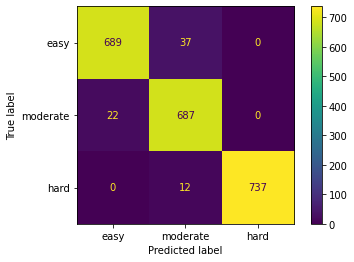

In [8]:
from keras.metrics import accuracy
pred = classifier.predict(X_test)
pred_ = np.argmax(pred, axis = 1)
pred_ = l_encode.inverse_transform(pred_)

true_y = l_encode.inverse_transform(np.argmax(to_categorical(y_test), axis = 1)[:,1])
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(true_y, pred_, labels=[0, 1, 2])
cmd = ConfusionMatrixDisplay(cm, display_labels=['easy','moderate', 'hard'])

cmd.plot()

cnt = 0
cnt_correct = 0
for i in range(len(pred)):
  cnt += 1
  if(pred_[i] == true_y[i]):
    cnt_correct += 1
print(f'accuracy: {(cnt_correct/cnt)*100:.2f}%')


ROC AUC score: 0.975612554909019


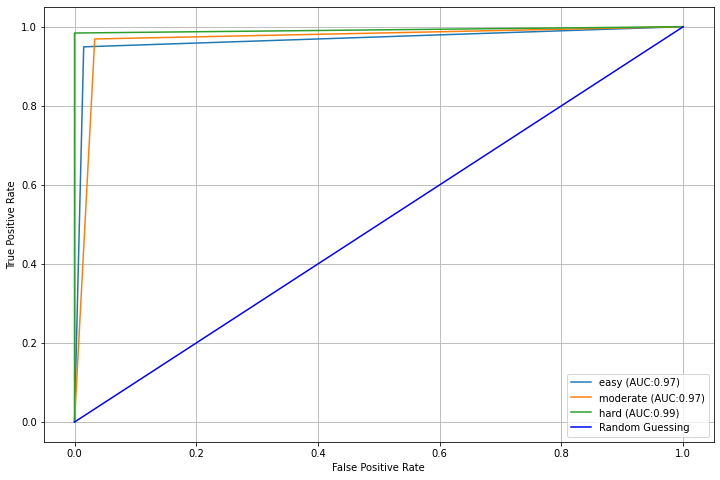

In [9]:
import matplotlib.pyplot as plt 
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import roc_curve, auc, roc_auc_score


target= ['easy', 'moderate', 'hard']

fig, c_ax = plt.subplots(1,1, figsize = (12, 8))

def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
    lb = LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    y_pred = lb.transform(y_pred)

    for (idx, c_label) in enumerate(target):
        fpr, tpr, thresholds = roc_curve(y_test[:,idx].astype(int), y_pred[:,idx])
        c_ax.plot(fpr, tpr, label = '%s (AUC:%0.2f)'  % (c_label, auc(fpr, tpr)))
    c_ax.plot(fpr, fpr, 'b-', label = 'Random Guessing')
    return roc_auc_score(y_test, y_pred, average=average)


print('ROC AUC score:', multiclass_roc_auc_score(true_y, pred_))

c_ax.legend()
c_ax.set_xlabel('False Positive Rate')
c_ax.set_ylabel('True Positive Rate')
plt.grid()
plt.show()

In [10]:
column_names = ['std.dev', 'rel. bound', 'min', 'av.length', 'm', 'y']
df_reg = pd.DataFrame(columns = column_names)
print(X_test_copy.shape[0])
print(len(pred))
for i in range(len(pred)):
  if(pred_[i] == 2):
    dictionary = {'std.dev' : X_test_copy.iloc[i]['std.dev'], 'min': X_test_copy.iloc[i]['min'], 'm' : X_test_copy.iloc[i]['m'],
                  'av.length' : X_test_copy.iloc[i]['av.length'], 'rel. bound' : X_test_copy.iloc[i]['rel. bound'],
                   'y': X_test_copy.iloc[i]['y']}
    df_reg = df_reg.append(dictionary, ignore_index = True)

2184
2184


In [11]:
column_names = ['class', 'rel. bound', 'min', 'n', 'av.length', 'y']
df_regm = pd.DataFrame(columns = column_names)
print(X_test_copy.shape[0])
print(len(pred))
for i in range(len(pred)):
  if(pred_[i] == 1):
    dictionary = {'class' : X_test_copy.iloc[i]['class'], 'min': X_test_copy.iloc[i]['min'], 'n' : X_test_copy.iloc[i]['n'],
                  'av.length' : X_test_copy.iloc[i]['av.length'], 'rel. bound' : X_test_copy.iloc[i]['rel. bound'],
                   'y': X_test_copy.iloc[i]['y']}
    df_regm = df_regm.append(dictionary, ignore_index = True)

2184
2184


In [12]:
column_names = ['n/m', 'rel. bound', 'm', 'av.length', 'y']
df_rege = pd.DataFrame(columns = column_names)
print(X_test_copy.shape[0])
print(len(pred))
for i in range(len(pred)):
  if(pred_[i] == 0):
    dictionary = {'n/m' : X_test_copy.iloc[i]['n/m'], 'm' : X_test_copy.iloc[i]['m'],
                  'av.length' : X_test_copy.iloc[i]['av.length'], 'rel. bound' : X_test_copy.iloc[i]['rel. bound'],
                   'y': X_test_copy.iloc[i]['y']}
    df_rege = df_rege.append(dictionary, ignore_index = True)

2184
2184


In [13]:
print(df_reg.head(5))
print(df_regm.head(5))
print(df_rege.head(5))

      std.dev  rel. bound    min   av.length     m          y
0   19.230997  938.628159   53.0  100.033333  72.0  11.153377
1  157.782181  754.352031  263.0  636.950623  72.0  10.714102
2  188.249496  779.880018  243.0  799.184998  80.0  10.710079
3  221.746948  391.530164  199.0  874.200012  80.0  12.900209
4   88.473389  937.829294  175.0  381.788879  40.0  11.258474
   class   rel. bound   min      n   av.length         y
0    3.0   627.802691  50.0  176.0   75.988640  2.489573
1    1.0   444.444444   1.0  120.0   51.483334  2.158536
2    4.0   588.235294  51.0  132.0   98.825760  5.135213
3    4.0   818.505338  41.0  100.0  103.150002  4.820492
4    3.0  1393.034826  51.0   90.0   76.733330  4.485626
    n/m  rel. bound     m   av.length         y
0   9.0  -14.749263   2.0   75.333336  0.000013
1   4.0  161.290323  15.0  106.550003  0.000380
2  10.0   19.083969  16.0  104.562500  0.000750
3   4.0   50.125313   5.0   99.000000  0.000304
4   4.0   25.773196   5.0   96.650002  0.00014

In [14]:
shuffled = df_reg.sample(frac=1).reset_index()

columns_dont_want = ['y', 'index', 'inst.name','type', 'CPLEXStatus']
select = [x for x in shuffled.columns if x not in columns_dont_want]

X = shuffled.loc[:, select]

y = shuffled.loc[:,'y']
#y = np.log(y + 100)
X_modified = X

In [15]:
from keras.models import Sequential
from keras.layers import Dense ,Dropout,BatchNormalization
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score

from keras.layers import Activation
from keras import backend as K
from keras.utils.generic_utils import get_custom_objects

import tensorflow as tf
from tensorflow import keras 
from tensorflow.python.ops import math_ops


def custom_activation(x):
    #return K.relu(tensorflow.subtract(x,-1)) - K.relu(tensorflow.subtract(x,3.5))
    return 10/(1+K.exp(-x))


get_custom_objects().update({'custom_activation': Activation(custom_activation)})

def make_model():
    model = Sequential()
    
    model.add(Dense(16, input_dim=X_modified.shape[1], activation='relu'))
    #model.add(Dropout(0.25))
    model.add(Dense(32, activation = 'relu'))
    model.add(Dense(16, activation = 'relu'))
    model.add(Dropout(0.2))
    #model.add(Dense(32, activation = 'relu'))
    model.add(Dense(8, activation = 'relu'))
    model.add(Dense(4, activation = 'relu'))
    model.add(Dense(1, activation = 'relu'))
    model.compile(loss='mean_squared_error', optimizer="Adam")
    return model

In [16]:
from sklearn import preprocessing

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc2 = StandardScaler()

X_train, X_test, y_train, y_test = train_test_split(X_modified, y, random_state=0, train_size = 0.8)
#X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, random_state=0, train_size = 0.83)

X_train = sc.fit_transform(X_train)
X_test_copy = X_test
X_test = sc.transform(X_test)
#X_val = sc.transform(X_val)

#y_train = sc2.fit_transform(y_train.values.reshape(-1,1))
#y_test = sc2.transform(y_test.values.reshape(-1,1))

estimator = KerasRegressor(build_fn=make_model, epochs=300, batch_size=16, verbose=1)

#history=estimator.fit(X_train,y_train)
from keras.metrics import accuracy
from keras import callbacks
earlystopping = callbacks.EarlyStopping(monitor ="val_loss", 
                                        mode ="min", patience = 5, 
                                        restore_best_weights = True)
  
history = estimator.fit(X_train, y_train, shuffle = True)
#plt.plot(history.history['val_accuracy'])

Epoch 1/300


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.


37/37 [==============================] - 1s 2ms/step - loss: 137.5242
Epoch 2/300
37/37 [==============================] - 0s 2ms/step - loss: 69.9711
Epoch 3/300
37/37 [==============================] - 0s 2ms/step - loss: 25.0624
Epoch 4/300
37/37 [==============================] - 0s 2ms/step - loss: 18.1876
Epoch 5/300
37/37 [==============================] - 0s 3ms/step - loss: 13.8991
Epoch 6/300
37/37 [==============================] - 0s 2ms/step - loss: 11.3334
Epoch 7/300
37/37 [==============================] - 0s 2ms/step - loss: 9.3438
Epoch 8/300
37/37 [==============================] - 0s 2ms/step - loss: 8.8013
Epoch 9/300
37/37 [==============================] - 0s 2ms/step - loss: 7.3241
Epoch 10/300
37/37 [==============================] - 0s 2ms/step - loss: 6.7708
Epoch 11/300
37/37 [==============================] - 0s 2ms/step - loss: 6.0791
Epoch 12/300
37/37 [==============================] - 0s 2ms/step - loss: 6.4750
Epoch 13/300
37/37 [======================

In [17]:
from sklearn.metrics import r2_score
prediction = estimator.predict(X_test)
#y_test = sc2.inverse_transform(y_test.reshape(-1,1))
yy = np.array(y_test)
#yy = np.exp(yy) - 100
#yy = np.power(yy, 10)/10
#prediction = sc2.inverse_transform(prediction.reshape(-1,1))
predd = np.array(prediction)
#predd = np.exp(predd)-100
#predd = np.power(predd, 10)/10
print("r_square score: ", r2_score(y_test,prediction))

from sklearn.metrics import mean_squared_error
from math import sqrt

print("RMSE:")
sqrt(mean_squared_error(yy, predd))

10/10 [==============================] - 0s 2ms/step
r_square score:  0.7578572202409579
RMSE:


1.0774750455447464

(10.0, 20.0)

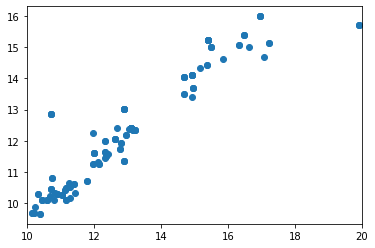

In [18]:
plt.scatter(yy, predd)
plt.xlim([10, 20])

In [19]:
shuffled = df_regm.sample(frac=1).reset_index()

columns_dont_want = ['y', 'index', 'inst.name','type', 'CPLEXStatus']
select = [x for x in shuffled.columns if x not in columns_dont_want]

X = shuffled.loc[:, select]

y = shuffled.loc[:,'y']
#y = np.log(y + 100)
X_modified = X

In [20]:

def custom_activation(x):
    #return K.relu(tensorflow.subtract(x,-1)) - K.relu(tensorflow.subtract(x,3.5))
    return 10/(1+K.exp(-x))


get_custom_objects().update({'custom_activation': Activation(custom_activation)})

def make_model():
    model = Sequential()
    
    model.add(Dense(16, input_dim=X_modified.shape[1], activation='relu'))
    #model.add(Dropout(0.25))
    model.add(Dense(32, activation = 'relu'))
    model.add(Dense(16, activation = 'relu'))
    model.add(Dropout(0.2))
    #model.add(Dense(32, activation = 'relu'))
    model.add(Dense(8, activation = 'relu'))
    model.add(Dense(4, activation = 'relu'))
    model.add(Dense(1, activation = 'relu'))
    model.compile(loss='mean_squared_error', optimizer="Adam")
    return model

In [21]:
from sklearn import preprocessing

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc2 = StandardScaler()

X_train, X_test, y_train, y_test = train_test_split(X_modified, y, random_state=0, train_size = 0.8)
#X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, random_state=0, train_size = 0.83)

X_train = sc.fit_transform(X_train)
X_test_copy = X_test
X_test = sc.transform(X_test)
#X_val = sc.transform(X_val)

#y_train = sc2.fit_transform(y_train.values.reshape(-1,1))
#y_test = sc2.transform(y_test.values.reshape(-1,1))

estimator = KerasRegressor(build_fn=make_model, epochs=300, batch_size=16, verbose=1)

#history=estimator.fit(X_train,y_train)
from keras.metrics import accuracy
from keras import callbacks
earlystopping = callbacks.EarlyStopping(monitor ="val_loss", 
                                        mode ="min", patience = 5, 
                                        restore_best_weights = True)
  
history = estimator.fit(X_train, y_train, shuffle = True)

Epoch 1/300


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.


37/37 [==============================] - 1s 2ms/step - loss: 19.6184
Epoch 2/300
37/37 [==============================] - 0s 2ms/step - loss: 19.6184
Epoch 3/300
37/37 [==============================] - 0s 2ms/step - loss: 19.6184
Epoch 4/300
37/37 [==============================] - 0s 2ms/step - loss: 19.6184
Epoch 5/300
37/37 [==============================] - 0s 2ms/step - loss: 19.6184
Epoch 6/300
37/37 [==============================] - 0s 2ms/step - loss: 19.6184
Epoch 7/300
37/37 [==============================] - 0s 2ms/step - loss: 19.6184
Epoch 8/300
37/37 [==============================] - 0s 2ms/step - loss: 19.6184
Epoch 9/300
37/37 [==============================] - 0s 2ms/step - loss: 19.6184
Epoch 10/300
37/37 [==============================] - 0s 2ms/step - loss: 19.6184
Epoch 11/300
37/37 [==============================] - 0s 2ms/step - loss: 19.6184
Epoch 12/300
37/37 [==============================] - 0s 2ms/step - loss: 19.6184
Epoch 13/300
37/37 [=================

In [22]:
from sklearn.metrics import r2_score
prediction = estimator.predict(X_test)
#y_test = sc2.inverse_transform(y_test.reshape(-1,1))
yy = np.array(y_test)
#yy = np.exp(yy) - 100
#yy = np.power(yy, 10)/10
#prediction = sc2.inverse_transform(prediction.reshape(-1,1))
predd = np.array(prediction)
#predd = np.exp(predd)-100
#predd = np.power(predd, 10)/10
print("r_square score: ", r2_score(y_test,prediction))

from sklearn.metrics import mean_squared_error
from math import sqrt

print("RMSE:")
sqrt(mean_squared_error(yy, predd))

10/10 [==============================] - 0s 2ms/step
r_square score:  0.5194108403211286
RMSE:


1.4298567245623883

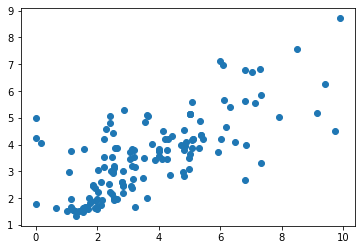

In [23]:
plt.scatter(yy, predd)

In [24]:
shuffled = df_rege.sample(frac=1).reset_index()

columns_dont_want = ['y', 'index', 'inst.name','type', 'CPLEXStatus']
select = [x for x in shuffled.columns if x not in columns_dont_want]

X = shuffled.loc[:, select]

y = shuffled.loc[:,'y']
#y = np.log(y + 100)
X_modified = X

In [25]:
def custom_activation(x):
    #return K.relu(tensorflow.subtract(x,-1)) - K.relu(tensorflow.subtract(x,3.5))
    return 10/(1+K.exp(-x))


get_custom_objects().update({'custom_activation': Activation(custom_activation)})

def make_model():
    model = Sequential()
    
    model.add(Dense(16, input_dim=X_modified.shape[1], activation='relu'))
    #model.add(Dropout(0.25))
    model.add(Dense(32, activation = 'relu'))
    model.add(Dense(16, activation = 'relu'))
    model.add(Dropout(0.2))
    #model.add(Dense(32, activation = 'relu'))
    model.add(Dense(8, activation = 'relu'))
    model.add(Dense(4, activation = 'relu'))
    model.add(Dense(1, activation = 'relu'))
    model.compile(loss='mean_squared_error', optimizer="Adam")
    return model

In [26]:
from sklearn import preprocessing

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc2 = StandardScaler()

X_train, X_test, y_train, y_test = train_test_split(X_modified, y, random_state=0, train_size = 0.8)
#X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, random_state=0, train_size = 0.83)

X_train = sc.fit_transform(X_train)
X_test_copy = X_test
X_test = sc.transform(X_test)
#X_val = sc.transform(X_val)

#y_train = sc2.fit_transform(y_train.values.reshape(-1,1))
#y_test = sc2.transform(y_test.values.reshape(-1,1))

estimator = KerasRegressor(build_fn=make_model, epochs=300, batch_size=16, verbose=1)

#history=estimator.fit(X_train,y_train)
from keras.metrics import accuracy
from keras import callbacks
earlystopping = callbacks.EarlyStopping(monitor ="val_loss", 
                                        mode ="min", patience = 5, 
                                        restore_best_weights = True)
  
history = estimator.fit(X_train, y_train, shuffle = True)

Epoch 1/300


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.


36/36 [==============================] - 1s 2ms/step - loss: 0.0865
Epoch 2/300
36/36 [==============================] - 0s 2ms/step - loss: 0.0794
Epoch 3/300
36/36 [==============================] - 0s 2ms/step - loss: 0.0766
Epoch 4/300
36/36 [==============================] - 0s 2ms/step - loss: 0.0764
Epoch 5/300
36/36 [==============================] - 0s 2ms/step - loss: 0.0733
Epoch 6/300
36/36 [==============================] - 0s 3ms/step - loss: 0.0748
Epoch 7/300
36/36 [==============================] - 0s 2ms/step - loss: 0.0774
Epoch 8/300
36/36 [==============================] - 0s 2ms/step - loss: 0.0739
Epoch 9/300
36/36 [==============================] - 0s 2ms/step - loss: 0.0731
Epoch 10/300
36/36 [==============================] - 0s 2ms/step - loss: 0.0768
Epoch 11/300
36/36 [==============================] - 0s 2ms/step - loss: 0.0712
Epoch 12/300
36/36 [==============================] - 0s 2ms/step - loss: 0.0738
Epoch 13/300
36/36 [=============================

In [27]:
from sklearn.metrics import r2_score
prediction = estimator.predict(X_test)
#y_test = sc2.inverse_transform(y_test.reshape(-1,1))
yy = np.array(y_test)
#yy = np.exp(yy) - 100
#yy = np.power(yy, 10)/10
#prediction = sc2.inverse_transform(prediction.reshape(-1,1))
predd = np.array(prediction)
#predd = np.exp(predd)-100
#predd = np.power(predd, 10)/10
print("r_square score: ", r2_score(y_test,prediction))

from sklearn.metrics import mean_squared_error
from math import sqrt

print("RMSE:")
sqrt(mean_squared_error(yy, predd))

9/9 [==============================] - 0s 2ms/step
r_square score:  0.09996549416281142
RMSE:


0.4311114679103033

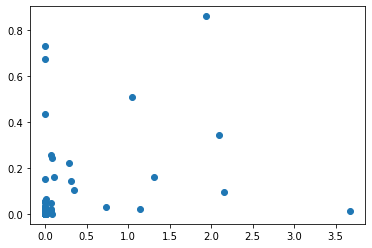

In [28]:
plt.scatter(yy, predd)